# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


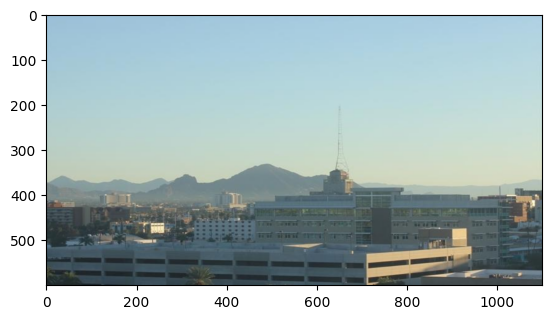

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label: 1


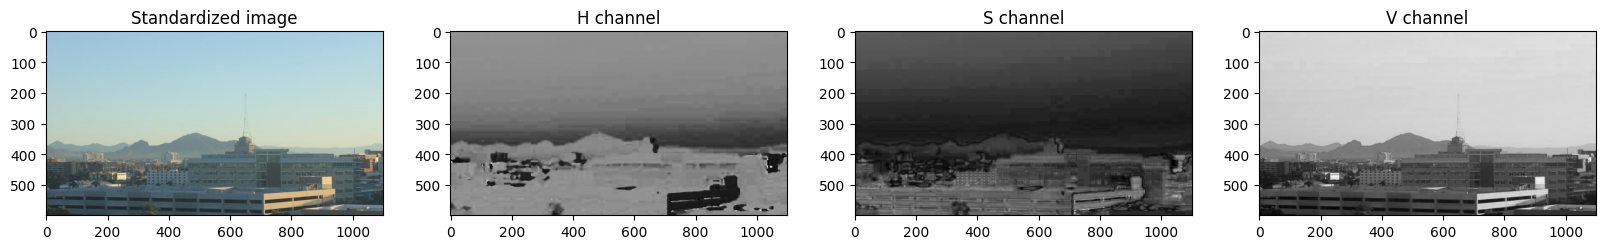

In [6]:
# Convert an image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


---
###  Find the average brightness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [10]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    avg = sum_brightness / (1100 *600)
    
    return avg

Avg brightness: 8.191893939393939


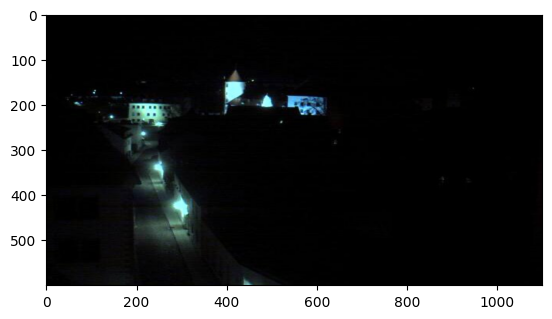

In [35]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 136
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

### **Brightness for all day images**

In [23]:
day_avg = 0
for img in range(120):
    avg = avg_brightness(STANDARDIZED_LIST[img][0])
    day_avg += avg
    print(img, avg, end="; ")
    if img % 9 == 0:
        print()

print("\nDAY AVERAGE =", day_avg/120)

0 175.09299242424242; 
1 192.90786666666668; 2 132.13382272727273; 3 199.7491909090909; 4 109.94720303030303; 5 200.02027575757575; 6 112.14201515151515; 7 103.30763636363636; 8 198.09555757575757; 9 104.23298181818181; 
10 197.4516621212121; 11 105.50642424242425; 12 195.10792575757577; 13 108.41986818181819; 14 195.45709242424243; 15 107.65071363636363; 16 196.82640303030303; 17 191.27498787878787; 18 111.65075757575758; 
19 181.73580606060605; 20 110.29915454545454; 21 187.70078636363635; 22 109.03925757575757; 23 188.28692575757574; 24 110.25234848484848; 25 189.62665757575758; 26 107.35852878787878; 27 191.53360757575757; 
28 105.60079242424243; 29 103.3687287878788; 30 145.51751212121212; 31 163.8033484848485; 32 160.2456484848485; 33 123.61741969696969; 34 158.01101212121213; 35 152.30368636363636; 36 157.36674393939393; 
37 104.06287272727273; 38 155.31952424242425; 39 129.84130303030304; 40 138.8351893939394; 41 129.66822878787877; 42 149.41024242424243; 43 129.73653636363636;

### **Brightness for all night images**

In [34]:
night_avg = 0
for img in range(120, 240):
    avg = avg_brightness(STANDARDIZED_LIST[img][0])
    night_avg += avg
    print(img, avg, end="; ")
    if img % 9 == 0:
        print()

print("\nDAY AVERAGE =", night_avg/120)

120 33.76165303030303; 121 33.01553333333333; 122 30.47462878787879; 123 29.425348484848485; 124 26.067339393939395; 125 25.646490909090907; 126 25.62610909090909; 
127 25.731924242424242; 128 25.80530606060606; 129 25.678615151515153; 130 27.820572727272726; 131 47.27310151515152; 132 48.420536363636366; 133 48.31327424242424; 134 25.862577272727272; 135 48.71303787878788; 
136 8.191893939393939; 137 27.68180606060606; 138 119.60317424242425; 139 8.43895606060606; 140 13.786887878787878; 141 25.715848484848486; 142 110.35060303030303; 143 8.305362121212122; 144 13.750727272727273; 
145 25.773092424242424; 146 109.47733939393939; 147 8.113616666666667; 148 14.399772727272728; 149 108.9886590909091; 150 13.262066666666666; 151 14.534516666666667; 152 113.24164242424243; 153 13.972930303030303; 
154 114.3161393939394; 155 112.85955303030303; 156 114.8846696969697; 157 114.73627121212121; 158 113.0011893939394; 159 27.90035909090909; 160 114.38604545454545; 161 29.071325757575757; 162 113